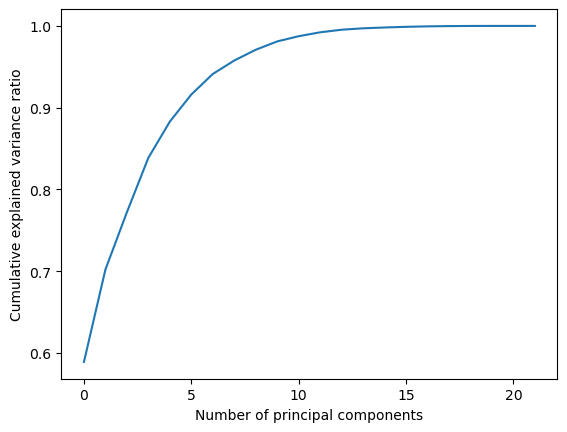

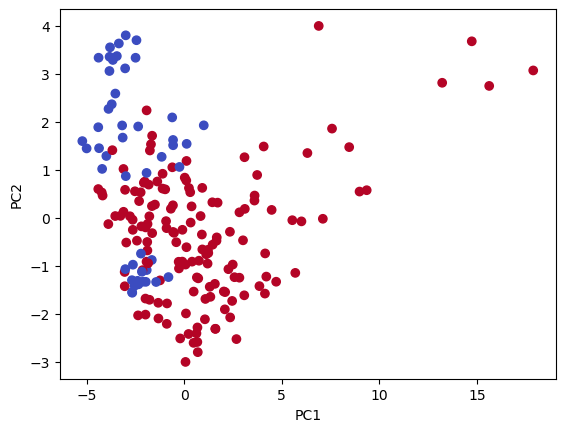

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Parkinson's Disease dataset
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data')

# Separate the target variable from the features
target = data.status
features = data.drop(['name', 'status'], axis=1)

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform PCA
pca = PCA()
pca.fit(scaled_features)

# Extract the explained variance ratios and eigenvalues
explained_var_ratios = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_

# Plot the scree plot
plt.plot(np.cumsum(explained_var_ratios))
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative explained variance ratio")
plt.show()

# Identify the number of principal components that explain at least 90% of the variance
num_components = np.where(np.cumsum(explained_var_ratios) >= 0.9)[0][0] + 1

# Extract the principal components
principal_components = pca.transform(scaled_features)[:, :num_components]

# Create a new dataframe with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=[f"PC{i}" for i in range(1, num_components+1)])

# Add the target variable to the new dataframe
principal_df['status'] = target.values

# Plot the first two principal components
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=principal_df['status'], cmap='coolwarm')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [10]:
principal_df.head()

PC1       PC2       PC3       PC4       PC5       PC6  status
0  2.096614 -1.550607 -1.265070 -0.840002 -0.726869  1.101991       1
1  4.709331 -1.334593 -1.057654 -2.139739 -1.177907  0.754064       1
2  3.852615 -1.426221 -1.824965 -1.163920 -1.265558  0.568478       1
3  4.134771 -1.581914 -1.388036 -1.463193 -1.405647  0.617057       1
4  5.689690 -1.150314 -2.421017 -1.344791 -0.849936  0.939659       1